É piú concentrato sui dati specificando bene dove vengono messi i dati. TF si concentra di piú sulle operazioni e vengono gestiti in automatico i device

In [10]:
import torch
torch.__version__

'2.0.0+cu117'

In [11]:
torch.cuda.is_available()

True

In [12]:
!nvidia-smi

Wed Apr  5 16:23:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 527.37       Driver Version: 527.37       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   41C    P8     5W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [13]:
data = [[1,2,3], [3,5,6]]
pt_data = torch.tensor(data)
pt_data.device

device(type='cpu')

Sposto la variabile sulla memoria della GPU assegandola alla ____ numero 0. Devo mettere tutte le variabili sullo stesso device per poter fare calcoli

In [14]:
# pt_data = pt_data.to(torch.device('cuda:0'))
# pt_data.device

Per quando voglio salvare i risultati delle operazioni (es. un immagine) sul disco devo passare da tipo pytorch a tipo numpy, passando prima peró da GPU a CPU

In [15]:
import numpy
np_data = pt_data.cpu().numpy()

### Read Datasets

In [16]:
path = '../data/eeg_PerceiveLab/'

eeg_data = torch.load(path + 'eeg_5_95_std.pth')
# eeg_data = torch.load(path + eeg_55_95_std.pth')
# eeg_data = torch.load(path + 'eeg_signals_raw_with_mean_std.pth')

split_all = torch.load(path + 'block_splits_by_image_all.pth')
split_single = torch.load(path + 'block_splits_by_image_single.pth')

### Explore structure

In [49]:
eeg_data['dataset'][1]

{'eeg': tensor([[-0.0120,  0.0473,  0.1264,  ...,  0.0109,  0.0188,  0.0211],
         [-0.0061,  0.0061,  0.0379,  ...,  0.0466,  0.0355,  0.0135],
         [ 0.0016,  0.0690,  0.1212,  ...,  0.0077, -0.0025,  0.0047],
         ...,
         [ 0.0189,  0.0461,  0.0376,  ..., -0.0657, -0.0639, -0.0245],
         [-0.0043,  0.0026,  0.0072,  ..., -0.0171, -0.0132, -0.0064],
         [ 0.0073,  0.1099,  0.1803,  ..., -0.1500, -0.1019, -0.0184]]),
 'image': 1,
 'label': 30,
 'subject': 4}

In [17]:
eeg_data.keys()

dict_keys(['dataset', 'labels', 'images'])

In [18]:
images = eeg_data['images']
print('numero di images: ', len(images))
print(*images[:5], sep='\n')

numero di images:  1996
n02951358_31190
n03452741_16744
n04069434_10318
n02951358_34807
n03452741_5499


In [19]:
# with open("files_list.txt", "w") as f:
#     for image in images:
#         f.write(str(image) +"\n")

In [20]:
# labels = o['labels']
labels = [image.split('_')[0] for image in images] # preserve order
print('numero di labels unici: ', len(set(labels)))
print(*labels[:5], sep='\n')

numero di labels unici:  40
n02951358
n03452741
n04069434
n02951358
n03452741


In [21]:
n_subjects = 6
print('numero di subjects: ', n_subjects)

numero di subjects:  6


In [22]:
print('numero di EEG: ', len(eeg_data['dataset']))
print(f'{len(images)} images * {n_subjects} subjects = {len(images)*n_subjects}')

numero di EEG:  11965
1996 images * 6 subjects = 11976


### Request images kaggle

In [23]:
# !kaggle competitions download -c imagenet-object-localization-challenge -f LOC_train_solution.csv

In [24]:
# from kaggle.api.kaggle_api_extended import KaggleApi

# api = KaggleApi()
# api.authenticate()

In [25]:
# from tqdm import tqdm
# import time

# wait = 600

# for _, (file, folder) in tqdm(enumerate(zip(files[500:], folders[500:])), total = len(files)):
#     while True:
#         try:
#             api.competition_download_file('imagenet-object-localization-challenge',
#                                 file_name = f'ILSVRC/Data/CLS-LOC/train/{folder}/{file}.JPEG',
#                                 path = f'./ImageNet_images/{folder}',
#                                 quiet = True)
#         except:
#             print(f'wait {wait} sec')
#             time.sleep(wait)
#             print(f'stop waiting')

### Exploration EEG signals

In [26]:
eeg_data['dataset'][0]

{'eeg': tensor([[-0.0098,  0.0195,  0.0620,  ...,  0.0638,  0.0120, -0.0118],
         [-0.0045,  0.1303,  0.2673,  ...,  0.0894,  0.0342, -0.0082],
         [ 0.0215, -0.2017, -0.4305,  ..., -0.2022, -0.0940,  0.0188],
         ...,
         [ 0.0160,  0.0707,  0.1005,  ...,  0.2066,  0.1156,  0.0036],
         [-0.0046, -0.0084, -0.0119,  ...,  0.0007, -0.0026, -0.0053],
         [ 0.0040,  0.0419,  0.0665,  ...,  0.0765,  0.0309, -0.0063]]),
 'image': 0,
 'label': 10,
 'subject': 4}

In [27]:
eeg_data['dataset'][0]['eeg'].shape

torch.Size([128, 500])

In [28]:
print(eeg_data['dataset'][0]['eeg'].min())
print(eeg_data['dataset'][0]['eeg'].max())

tensor(-6.2825)
tensor(2.9073)


- canali piu importanti?
- dimensioni immagini da ricostruire?
- usare dataset con anche info sugli occhi(?)

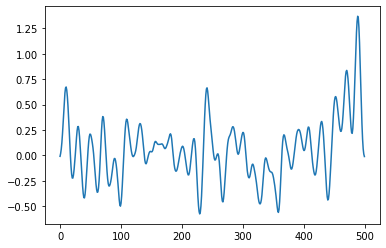

In [29]:
from matplotlib import pyplot as plt

example_55_95 = eeg_data['dataset'][0]['eeg'][0,:].numpy()
plt.plot(example_55_95)

C:\Users\gianl\AppData\Roaming\Python\Python39\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


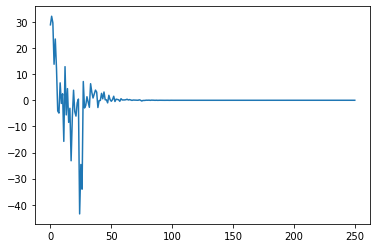

In [30]:
# from scipy.fft import rfft, rfftfreq
import numpy as np
plt.plot(np.fft.rfft(example_55_95))

In [31]:
freq = np.fft.rfftfreq(500, d=1./1000)

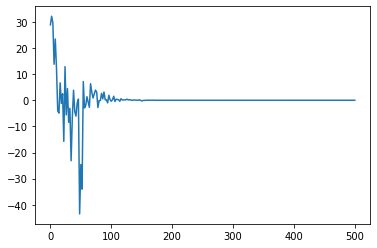

In [32]:
plt.plot(freq, np.fft.rfft(example_55_95))

In [33]:
# from scipy.fft import fft, fftfreq, rfft, rfftfreq
# from scipy.signal import spectrogram
# from librosa.feature import melspectrogram, mfcc
# from librosa.display import specshow

### Other datasets exploration

In [34]:
print(split_all.keys())
print(len(split_all['splits']))
print(split_all['splits'][0].keys()) # 6 possibilita diverse di split (usare lo 0!)
print(len(split_all['splits'][0]['train']) + len(split_all['splits'][0]['val']) + len(split_all['splits'][0]['test']))

dict_keys(['splits'])
6
dict_keys(['train', 'val', 'test'])
11965


In [35]:
print(split_single.keys())
print(len(split_single['splits']))
print(split_single['splits'][0].keys()) # c'é un unico split proposto
print(len(split_single['splits'][0]['train']) + len(split_single['splits'][0]['val']) + len(split_single['splits'][0]['test']))

dict_keys(['splits'])
1
dict_keys(['train', 'val', 'test'])
1000


### Train, test, val split

In [36]:
print(len(eeg_data['dataset']))
print(len(split_all['splits'][0]['train']) + len(split_all['splits'][0]['val']) + len(split_all['splits'][0]['test']))

11965
11965


In [72]:
# eeg_data_train = {'dataset': [eeg_data['dataset'][i] for i in split_all['splits'][0]['train']],
#                   'labels': set([eeg_data['dataset'][i]['label'] for i in split_all['splits'][0]['train']]),
#                   'images': set([eeg_data['dataset'][i]['image'] for i in split_all['splits'][0]['train']])}
# eeg_data_val = {'dataset': [eeg_data['dataset'][i] for i in split_all['splits'][0]['val']]}
# eeg_data_test = {'dataset': [eeg_data['dataset'][i] for i in split_all['splits'][0]['test']]}

In [80]:
eeg_data['dataset'][0]

{'eeg': tensor([[-0.0098,  0.0195,  0.0620,  ...,  0.0638,  0.0120, -0.0118],
         [-0.0045,  0.1303,  0.2673,  ...,  0.0894,  0.0342, -0.0082],
         [ 0.0215, -0.2017, -0.4305,  ..., -0.2022, -0.0940,  0.0188],
         ...,
         [ 0.0160,  0.0707,  0.1005,  ...,  0.2066,  0.1156,  0.0036],
         [-0.0046, -0.0084, -0.0119,  ...,  0.0007, -0.0026, -0.0053],
         [ 0.0040,  0.0419,  0.0665,  ...,  0.0765,  0.0309, -0.0063]]),
 'image': 0,
 'label': 10,
 'subject': 4}

In [84]:
eeg_data_train = {'eeg': [eeg_data['dataset'][i]['eeg'] for i in split_all['splits'][0]['train']],
                  'labels': [eeg_data['dataset'][i]['label'] for i in split_all['splits'][0]['train']]}
eeg_data_val = {'eeg': [eeg_data['dataset'][i]['eeg'] for i in split_all['splits'][0]['val']],
                  'labels': [eeg_data['dataset'][i]['label'] for i in split_all['splits'][0]['val']]}
eeg_data_test = {'eeg': [eeg_data['dataset'][i]['eeg'] for i in split_all['splits'][0]['test']],
                  'labels': [eeg_data['dataset'][i]['label'] for i in split_all['splits'][0]['test']]}

In [87]:
print('train\t', len(eeg_data_train['eeg']))
print('val\t', len(eeg_data_val['eeg']))
print('test\t', len(eeg_data_test['eeg']))

train	 7970
val	 1998
test	 1997


## Classification

Create the dataset

In [114]:
class EEGDataset:
    
    # Constructor
    def __init__(self, eeg_data):
        # Load EEG signals
        self.eeg = eeg_data['eeg']        
        self.labels = eeg_data['labels']
        
        # Compute size
        self.size = len(self.eeg)

    # Get size
    def __len__(self):
        return self.size

    # Get item
    def __getitem__(self, idx):
        # Process EEG
        eeg = self.eeg[idx]
        eeg = eeg[:,20:460]
        # # eeg = self.data[i]["eeg"].float().t()
        label = self.labels[idx]
        # Return

        return eeg, label

In [115]:
train = EEGDataset(eeg_data_train)
val = EEGDataset(eeg_data_val)
test = EEGDataset(eeg_data_test)

In [116]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train, batch_size=64)
val_loader = DataLoader(val, batch_size=64)
test_loader = DataLoader(test, batch_size=64)

In [118]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to('cuda')
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
